## Detection of breast cancer using VGG19 and Transfer Learning technique

- Mammogram image soure: [MIAS database](http://peipa.essex.ac.uk/info/mias.html) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sat Feb 27 07:40:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 38kB/s 


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


Please download the dataset from the below url

In [ ]:
# import the libraries as shown below

import cv2
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from skimage import io
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
z = ['MIAS database reference number', 'Character of background tissue',
     'Class of abnormality present', 'Severity of abnormality',
     'x coordinates of centre of abnormality', 'y coordinates of centre of abnormality',
     'Approximate radius (in pixels) of a circle enclosing the abnormality']

In [ ]:
z1 = ['Character of background tissue','Class of abnormality present',
     'x coordinates of centre of abnormality', 'y coordinates of centre of abnormality',
     'Approximate radius (in pixels) of a circle enclosing the abnormality']

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/all-mias/image_details.txt',sep=' ',names = z )
a

,MIAS database reference number,Character of background tissue,Class of abnormality present,Severity of abnormality,x coordinates of centre of abnormality,y coordinates of centre of abnormality,Approximate radius (in pixels) of a circle enclosing the abnormality
0,mdb001,G,CIRC,B,535,425,197.0
1,mdb002,G,CIRC,B,522,280,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [ ]:
b = pd.read_csv('/content/drive/MyDrive/all-mias/image_details.txt',sep=' ',names = z )
b.drop(columns=z1, inplace = True)
b

,MIAS database reference number,Severity of abnormality
0,mdb001,B
1,mdb002,B
2,mdb003,NaN
3,mdb004,NaN
4,mdb005,B
...,...,...
325,mdb318,NaN
326,mdb319,NaN
327,mdb320,NaN
328,mdb321,NaN


In [ ]:
b['Severity of abnormality'].value_counts()

B    69
M    54
Name: Severity of abnormality, dtype: int64

In [ ]:
b.dropna(inplace = True)
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 322
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   MIAS database reference number  123 non-null    object
 1   Severity of abnormality         123 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [ ]:
b

,MIAS database reference number,Severity of abnormality
0,mdb001,B
1,mdb002,B
4,mdb005,B
5,mdb005,B
10,mdb010,B
...,...,...
281,mdb274,M
297,mdb290,B
319,mdb312,B
321,mdb314,B


In [ ]:
train,test = train_test_split(b,test_size = 0.1,random_state=1)

In [ ]:
train

,MIAS database reference number,Severity of abnormality
277,mdb270,M
247,mdb241,M
319,mdb312,B
4,mdb005,B
221,mdb219,B
...,...,...
19,mdb019,B
192,mdb190,B
25,mdb025,B
254,mdb248,B


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 135 to 241
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   MIAS database reference number  13 non-null     object
 1   Severity of abnormality         13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [ ]:
test

,MIAS database reference number,Severity of abnormality
135,mdb134,M
271,mdb264,M
193,mdb191,B
250,mdb244,B
130,mdb130,M
102,mdb102,M
181,mdb179,M
132,mdb132,B
236,mdb231,M
213,mdb211,M


In [ ]:
x = glob.glob('/content/drive/MyDrive/all-mias/*.pgm')

In [ ]:
d = train.groupby('Severity of abnormality')
e = d.get_group('B')
e

,MIAS database reference number,Severity of abnormality
319,mdb312,B
4,mdb005,B
221,mdb219,B
145,mdb144,B
177,mdb175,B
...,...,...
197,mdb195,B
19,mdb019,B
192,mdb190,B
25,mdb025,B


In [ ]:
f = d.get_group('M')
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 277 to 115
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   MIAS database reference number  45 non-null     object
 1   Severity of abnormality         45 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [ ]:
d1 = test.groupby('Severity of abnormality')
e1 = d1.get_group('B')
e1

,MIAS database reference number,Severity of abnormality
193,mdb191,B
250,mdb244,B
132,mdb132,B
241,mdb236,B


In [ ]:
f1 = d1.get_group('M')
f1

,MIAS database reference number,Severity of abnormality
135,mdb134,M
271,mdb264,M
130,mdb130,M
102,mdb102,M
181,mdb179,M
236,mdb231,M
213,mdb211,M
272,mdb265,M
105,mdb105,M


In [ ]:
pb = list(e['MIAS database reference number'])
qb = []
for i in range(len(pb)):
    qb.append(pb[i][3:])

In [ ]:
path = '/content/drive/MyDrive/all-mias/train/benign'
for i in range(len(qb)):
    for f in range(len(x)):
        if qb[i] == x[f][-7:-4]:
            img = cv2.imread(x[f])
            name = str(qb[i])+'.jpg'
            cv2.imwrite(os.path.join(path , name), img)
            cv2.waitKey(0)
            break

In [ ]:
pm = list(f['MIAS database reference number'])
qm = []
for i in range(len(pm)):
    qm.append(pm[i][3:])

In [ ]:
path = '/content/drive/MyDrive/all-mias/train/malignant'
for i in range(len(qm)):
    for f in range(len(x)):
        if qm[i] == x[f][-7:-4]:
            img = cv2.imread(x[f])
            name = str(qm[i])+'.jpg'
            cv2.imwrite(os.path.join(path , name), img)
            cv2.waitKey(0)
            break

In [ ]:
pb1 = list(e1['MIAS database reference number'])
qb1 = []
for i in range(len(pb1)):
    qb1.append(pb1[i][3:])

In [ ]:
path = '/content/drive/MyDrive/all-mias/test/benign'
for i in range(len(qb1)):
    for f in range(len(x)):
        if qb1[i] == x[f][-7:-4]:
            img = cv2.imread(x[f])
            name = str(qb1[i])+'.jpg'
            cv2.imwrite(os.path.join(path , name), img)
            cv2.waitKey(0)
            break

In [ ]:
pm1 = list(f1['MIAS database reference number'])
qm1 = []
for i in range(len(pm1)):
    qm1.append(pm1[i][3:])

In [ ]:
path = '/content/drive/MyDrive/all-mias/test/malignant'
for i in range(len(qm1)):
    for f in range(len(x)):
        if qm1[i] == x[f][-7:-4]:
            img = cv2.imread(x[f])
            name = str(qm1[i])+'.jpg'
            cv2.imwrite(os.path.join(path , name), img)
            cv2.waitKey(0)
            break

## VGG 19 model

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/all-mias/train'
valid_path = '/content/drive/MyDrive/all-mias/test'


In [ ]:
# Importing the Vgg 19 library and adding preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
# Not training the existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/all-mias/train/*')

In [ ]:
folders

['/content/drive/MyDrive/all-mias/train/benign',
 '/content/drive/MyDrive/all-mias/train/malignant']

In [ ]:
# Flattening the output layer
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# creating a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# telling the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/all-mias/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 104 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/all-mias/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 13 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
4/4 [==============================] - 43s 11s/step - loss: 1.6104 - accuracy: 0.5188 - val_loss: 0.7000 - val_accuracy: 0.6923
Epoch 2/50
4/4 [==============================] - 3s 677ms/step - loss: 0.8474 - accuracy: 0.5424 - val_loss: 1.4976 - val_accuracy: 0.3077
Epoch 3/50
4/4 [==============================] - 3s 674ms/step - loss: 0.8093 - accuracy: 0.6126 - val_loss: 1.0220 - val_accuracy: 0.6923
Epoch 4/50
4/4 [==============================] - 3s 890ms/step - loss: 1.5651 - accuracy: 0.3061 - val_loss: 2.1271 - val_accuracy: 0.3077
Epoch 5/50
4/4 [==============================] - 3s 869ms/step - loss: 1.1222 - accuracy: 0.6474 - val_loss: 0.6658 - val_accuracy: 0.6154
Epoch 6/50
4/4 [==============================] - 3s 663ms/step - loss: 0.8056 - accuracy: 0.4641 - val_loss: 0.9011 - val_accuracy: 0.2308
Epoch 7/50
4/4 [==============================] - 3s 655ms/step - loss: 0.7959 - accuracy: 0.6288 - val_loss: 1.0481 - val_accuracy: 0.2308
Epoch 8/50
4/4 [=====

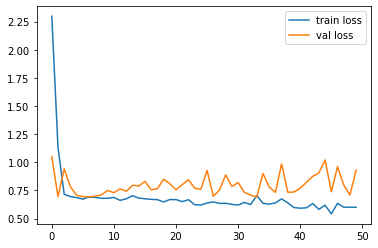

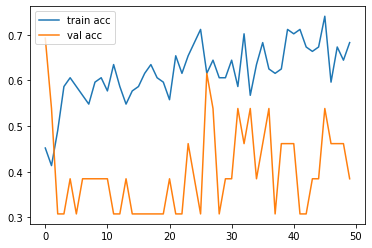

<Figure size 432x288 with 0 Axes>

In [ ]:
# ploting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# ploting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('breastcancer_model1_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[0.5759434 , 0.74600774],
       [0.56044835, 0.82880586],
       [0.68140125, 0.59502095],
       [0.5405823 , 0.79820895],
       [0.83372927, 0.54152215],
       [0.54766524, 0.7336585 ],
       [0.6878718 , 0.74299276],
       [0.5404006 , 0.76226056],
       [0.5809592 , 0.78338   ],
       [0.6680598 , 0.74400723],
       [0.36346644, 0.9186079 ],
       [0.67756486, 0.7630673 ],
       [0.75909346, 0.67734647]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/breastcancer_model1_vgg19.h5')

In [ ]:
img1=image.load_img('/content/drive/MyDrive/all-mias/test/benign/132.jpg',target_size=(224,224))
img2=image.load_img('/content/drive/MyDrive/all-mias/test/malignant/102.jpg',target_size=(224,224))

In [ ]:
import cv2
import matplotlib.pyplot as plt

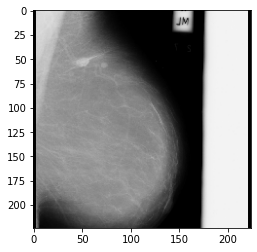

In [ ]:
plt.imshow(img1)

In [ ]:
x=image.img_to_array(img1)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("benign")
else:
    print("malignant")

benign


In [ ]:
img_data

array([[[[-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ],
         ...,
         [-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ]],

        [[-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ],
         ...,
         [-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ]],

        [[-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ],
         ...,
         [-103.93508, -116.77508, -123.67608],
         [-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ]],

        ...,

        [[-103.939  , -116.779  , -123.68   ],
         [-103.939  , -116.779  , -123.68   ]

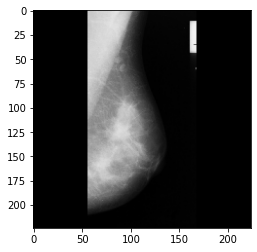

In [ ]:
plt.imshow(img2)

In [ ]:
x2=image.img_to_array(img2)

In [ ]:
x2.shape

(224, 224, 3)

In [ ]:
x2=x2/255

In [ ]:
x2=np.expand_dims(x2,axis=0)
img_data2=preprocess_input(x2)
img_data2.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data2)

array([[0., 1.]], dtype=float32)

In [ ]:
a2=np.argmax(model.predict(img_data2), axis=1)

In [ ]:
if(a==1):
    print("benign")
else:
    print("malignant")

benign


In [ ]:
img_data2

array([[[[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        ...,

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -1

In [ ]:
test

,MIAS database reference number,Severity of abnormality
135,mdb134,M
271,mdb264,M
193,mdb191,B
250,mdb244,B
130,mdb130,M
102,mdb102,M
181,mdb179,M
132,mdb132,B
236,mdb231,M
213,mdb211,M


In [ ]:
benign = pd.get_dummies(test['Severity of abnormality'],drop_first=True)
y_test = list(benign['M'])
y_test

[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 2]
 [1 8]]


0.7692307692307693